# 3 - Monte Carlo Integration (I)

##### Imports:

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import statistics 
from scipy import stats
import time

##### Configure matplotlib settings

In [2]:
plt.style.use('ggplot')
plt.rcParams.update(
    {"text.usetex": True,
     "font.serif": "Modern Roman",
     "figure.figsize": (10, 8),
     "axes.titlesize" : 26,
     "axes.labelsize" : 28,
     "lines.linewidth": 3,
     "lines.markersize" : 10,
     "legend.fontsize":20,
     "xtick.labelsize" : 24,
     "ytick.labelsize" : 24})

##### Functions:

In [3]:
def g(x, y, z):
    return (x + y + z)**2

In [7]:
def approximate_integral(npts, nrep):
    '''Approximates the integral using the Monte Carlo method from the course notes'''
    I = []
    for k in range(nrep):
        s = 0
        for i in range(npts):
            x = random.gauss(0,1); y = random.gauss(0,1); z = random.gauss(0,1);
            s += g(x, y, z)
        I.append(s*(2*np.pi)**1.5/npts)
    return I

In [33]:
def compute_new_average(averages, value):
    N = len(averages)
    
    if N == 0:
        return value
    
    else:
        return (N/(N+1))*averages[-1] + value/(N+1)

In [35]:
def steps_integral(npts, prev_averages = []):
    '''Saves all the intermediate steps when calculating the approximation for the integral. (See exercise 4.4)'''
    
    # Start from previous collection of averages - start new approximation
    if prev_averages == []:
        averages = []
    else:
        averages = prev_averages
    
    # Start approximating, return the approximation each time
    for i in range(npts):
            x = random.gauss(0,1); y = random.gauss(0,1); z = random.gauss(0,1);
            
            value = g(x, y, z)
            new_average = compute_new_average(averages, value)
            averages.append(new_average)
            
    return averages

Store the exact value of the integral.

In [4]:
exact = 3*(2*np.pi)**1.5

## 3.2 - Numerical approximation of the integral

Approximate the integral: you can play around with npts and nrep to get a better approximation.

In [23]:
# Number of points per run: npts, Number of replicas: nrep
npts = 10**4; nrep=100;
I = approximate_integral(npts, nrep)

In [24]:
print("Approximation of the integral is %0.4f, the exact value is %0.4f, the sample standard deviation was %0.4f" %(np.mean(I), exact, np.std(I)))

Approximation of the integral is 47.1200, the exact value is 47.2488, the sample standard deviation was 0.6609


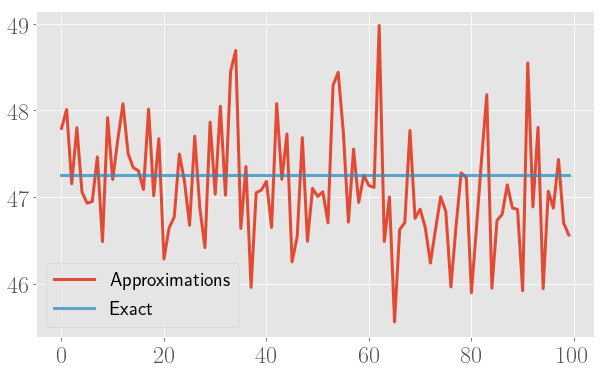

In [26]:
plt.subplots(figsize =  (10,6))
plt.plot(I, label = "Approximations") 
plt.plot(exact_vector(len(I)), alpha = 0.75, label = "Exact")
plt.legend()
#plt.savefig("ex3_approximation_integral.pdf", bbox_inches = 'tight')
plt.show()

## 3.3 - Variances

In [27]:
npts_list = np.arange(50, 6050, 50)

The following command block takes a bit of time.

In [29]:
nrep = 100
var = []
inverse_var = []

start = time.time()
for npts in npts_list:
    I = approximate_integral(npts, nrep)
    value = np.var(I)/np.mean(I)
    
    var.append(value)
    inverse_var.append(1/value)
    
end = time.time()
print("Elapsed time was ", end - start, " seconds.")

Elapsed time was  92.118412733078  seconds.


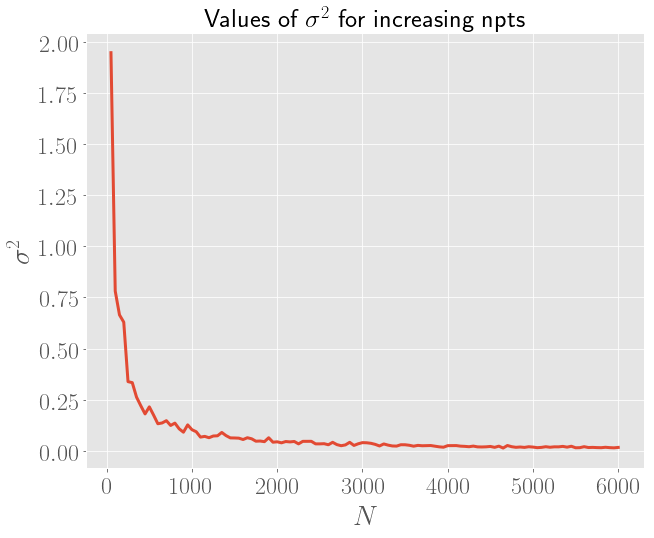

In [30]:
plt.plot(npts_list, var, label = r"$\sigma^2$")
#plt.legend()
plt.title(r'Values of $\sigma^2$ for increasing npts')
plt.xlabel(r'$N$')
plt.ylabel(r'$\sigma^2$')
plt.savefig('ex3_variances.pdf', bbox_inches = 'tight')
plt.show()

In [31]:
slope, intercept, r_value, p_value, std_err = stats.linregress(npts_list, inverse_var)
print('The coefficient of determination for the fit is equal to %0.4f. The slope is %0.4f and the intercept is %0.4f' %(r_value**2, slope, intercept))

The coefficient of determination for the fit is equal to 0.9322. The slope is 0.0105 and the intercept is 0.5559


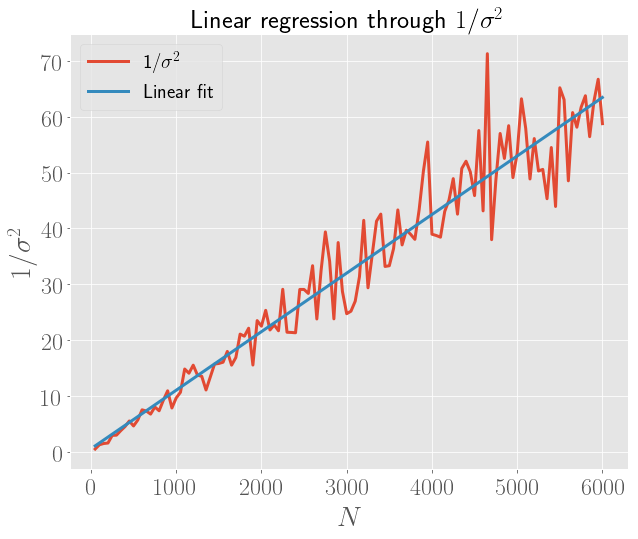

In [32]:
plt.plot(npts_list, inverse_var, label = r"1/$\sigma^2$")
t = np.arange (npts_list[0], npts_list[-1], 1)
y = slope*t + intercept
plt.plot(t, y, label = "Linear fit")
plt.xlabel(r'$N$')
plt.ylabel(r'$1/\sigma^2$')
plt.title(r'Linear regression through $1/\sigma^2$')
plt.legend()
plt.savefig("ex3_regression.pdf", bbox_inches = 'tight')
plt.show()

## For exercise 4.4 - Comparison between Gaussian RNG and Metropolis

In Problem 4, exercise 4, we are asked to compare the Gaussian RNG with the Metropolis algorithm. For this, I defined the function steps_integral, and will plot something below for my discussion.

Define a new function which returns the average of $g(x,y,z)$ evaluations at each step.

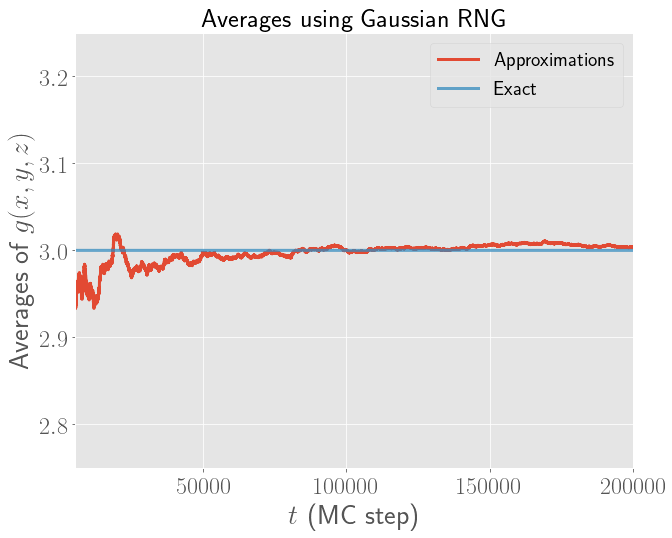

In [52]:
# Make approximation of value 3 after npts iterations
npts = 2*10**5
avgs = steps_integral(npts) # avgs as abbreviation for averages; use another name than in function


# Make a plot of the approximations at each step & exact value
plt.plot(avgs, label = 'Approximations')
plt.plot([3 for i in range(len(avgs))], alpha = 0.75, label = 'Exact')


# Make fancy, save and show
plt.ylim(2.75, 3.25)
plt.xlim(5000, len(avgs))
plt.xlabel(r'$t$ (MC step)')
plt.ylabel(r'Averages of $g(x,y,z)$')
plt.title('Averages using Gaussian RNG')
plt.legend()
#plt.savefig('ex4_comparison_Gaussian.pdf', bbox_inches = 'tight')

plt.show()

The output of the above algorithm is always relatively consistent. This will be compared with the Metropolis algorithm of exercise 4.